In [1]:
%matplotlib inline
# %matplotlib notebook # Does not work 
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from hpbandster.core.result import logged_results_to_HBS_result

In [2]:
def get_runs(file):
    results = pickle.load(open(file, "rb"))
    return results['hpo_results']

In [3]:
tvqa_bohb_config = './workdir/hpo_results_bohb/'
tvqa_rs_results = './workdir/hpo_results_rs/'

In [4]:
# bohb_file = './bioasq_dir/bioasq_hpo_results_bohb.pickle'
# rs_file = './bioasq_dir/bioasq_hpo_results_rs.pickle'

In [5]:
tvqa_bohb_dir = './workdir/hpo_results_bohb/'
tvqa_rs_dir = './workdir/hpo_results_rs/'

In [6]:
# bohb_file = './robust_dir/robust_hpo_results_bohb20190925.pickle'
# rs_file = './robust_dir/robust_hpo_results_rs20190925.pickle'

In [7]:
# Intermediate results

# bohb_results = logged_results_to_HBS_result(bio_bohb_dir)
# rs_results = logged_results_to_HBS_result(bio_rs_dir)

bohb_results = logged_results_to_HBS_result(tvqa_bohb_dir)
rs_results = logged_results_to_HBS_result(tvqa_rs_dir)

In [8]:
# # Final results

# bohb_results = get_runs(bohb_file)
# rs_results = get_runs(rs_file)

In [9]:
# 

all_runs_bohb = bohb_results.get_all_runs()
all_runs_rs = rs_results.get_all_runs()

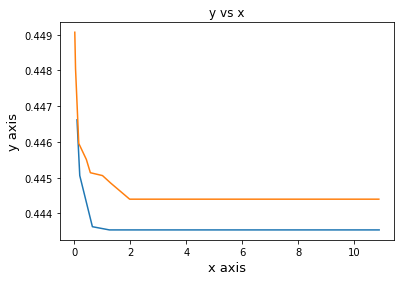

In [10]:
hour = 3600

pp = PdfPages('hpo_test.pdf')
plt.figure()
plt.clf()

plt.title('y vs x')
plt.xlabel('x axis', fontsize = 13)
plt.ylabel('y axis', fontsize = 13)


incumbent_rs = rs_results.get_incumbent_trajectory()
incumbent_bohb = bohb_results.get_incumbent_trajectory()
plt.plot([x/hour for x in incumbent_rs['times_finished']], incumbent_rs['losses'])
plt.plot([x/hour for x in incumbent_bohb['times_finished']], incumbent_bohb['losses'])
pp.savefig()
plt.show()
pp.close()

In [11]:
min(rs_results.get_incumbent_trajectory()['losses'])

0.44354000000000005

In [12]:
rs_results.get_incumbent_trajectory()

{'config_ids': [(0, 0, 0), (1, 0, 0), (9, 0, 0), (18, 0, 0), (18, 0, 0)],
 'times_finished': [341.07836961746216,
  695.3013651371002,
  2320.578613758087,
  4507.054939985275,
  39204.07489991188],
 'budgets': [100, 100, 100, 100, 100],
 'losses': [0.44662,
  0.44506,
  0.44362999999999997,
  0.44354000000000005,
  0.44354000000000005]}

In [13]:
min(bohb_results.get_incumbent_trajectory()['losses'])

0.4444

In [14]:
bohb_results.get_runs_by_id(bohb_results.get_incumbent_id())[0].info

{'s': {'metric': 0.55224,
  'info': {'label': 'Accuracy based, LambdaMART optimized based on P@1',
   'model_file': './workdir/tvqa_lmart_id45_budget33_leaves35_lr0.14_n1900'}},
 'mean_metric': 0.55224,
 'std_metric': 0.0}